In [1]:
import pandas as pd
import json
import seaborn as sns

In [57]:
 census_dataset = pd.read_csv('../datasets/2011-census-microdata/2011-census-microdata-small.csv')

In [58]:
census_dataset.head(n=10)

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
5,7394750,E12000001,H,2,1,1,6,2,2,1,2,1,1,1,9,2,3,3
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
7,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
8,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
9,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4


# Synthpop

Synthpop is an R package for producing synthetic microdata using sequential modelling.

- `vars_sequence` (_array_): the order in which to synthesise the variable (i.e. columns). A variable is synthesised conditional on all the variables that precede it in the list, e.g. (3,5,1) means that variable 1 is synthesised conditional on variables 3 and 5. Note that only variables that have a synthesis method assigned to them in synthesis_methods are actually synthesised. The other variables in vars_sequence are just replicated from the original data.
  - items (_integer_): one-indexed column id
- `synthesis_methods` (_array_): The method to use to synthesize each variable (i.e. column)
  - items (_string_): See the synthpop manual for a complete list of options.  Common
    choices are "sample" (independently resample this column), "" (no synthesis, just replication of the original data), "cart" (synthesize using the Classification And Regression Tree method).  The column created first (i.e. the first in vars_sequence) must contain "sample" in synthesis_methods.
- `proper` (_boolean_): If "true", synthesis is done using the full joint posterior, if "false" it is done sequentially.
- `tree_minbucket` (_integer_): for the tree-based synthesis, the minimum acceptable
  number of real records in each leaf node.
- `smoothing` (_object_): Not implemented at the moment, set to [].

In [47]:
with open('../run-inputs/2011-census-test-3-synthpop.json') as jsonFile:
    inputs = json.load(jsonFile)
    jsonFile.close()
print(json.dumps(inputs, indent=4, sort_keys=True))

{
    "dataset": "datasets/2011-census-microdata/2011-census-microdata-small",
    "enabled": true,
    "parameters": {
        "enabled": true,
        "num_datasets_to_synthesize": 5,
        "num_samples_to_fit": -1,
        "num_samples_to_synthesize": -1,
        "proper": false,
        "random_state": 12345,
        "smoothing": {},
        "synthesis_methods": [
            "sample",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            ""
        ],
        "tree_minbucket": 5,
        "vars_sequence": [
            1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
    

# Synthetic data

In [48]:
# %%bash
# cd ..
# make run-2011-census-test-3-synthpop

Process is interrupted.


In [59]:
synthetic_data_1 = pd.read_csv('../synth-output/2011-census-test-3-synthpop/synthetic_data_1.csv')

In [61]:
synthetic_data_1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7404794,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7434126,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7403841,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7394898,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7425960,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [62]:
census_dataset.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


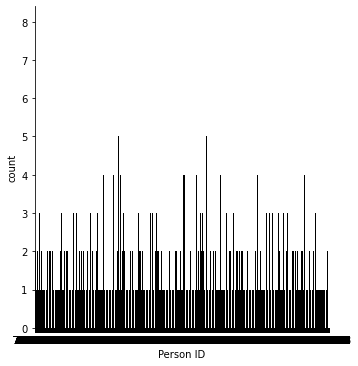

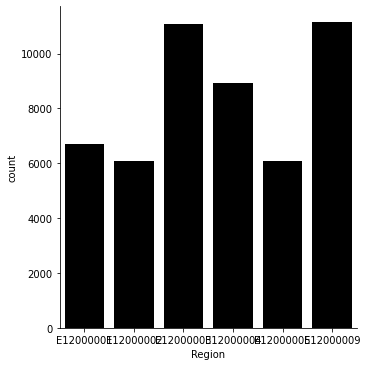

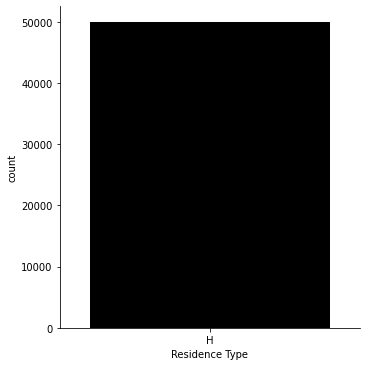

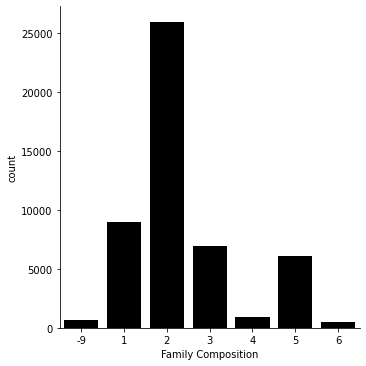

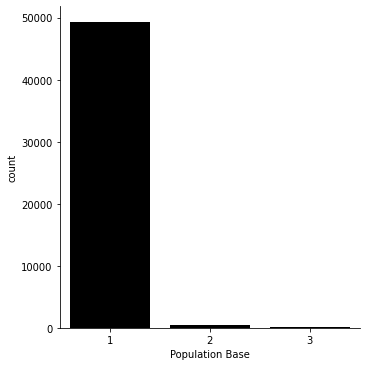

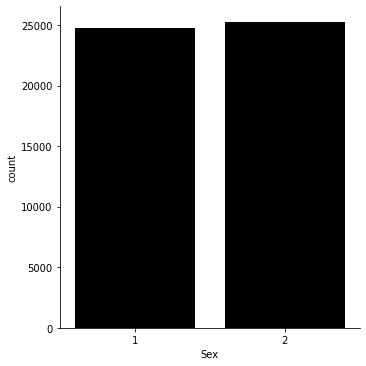

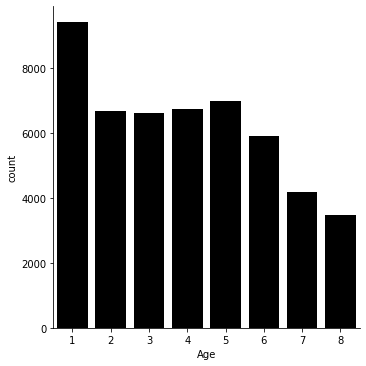

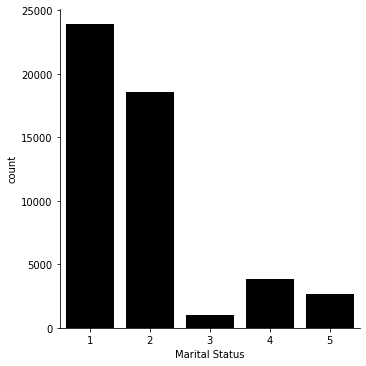

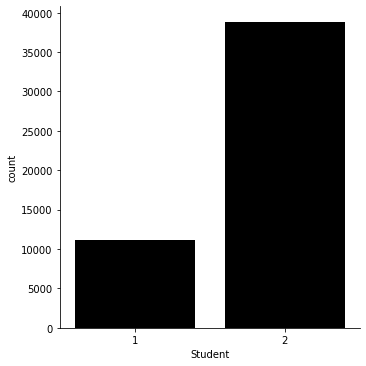

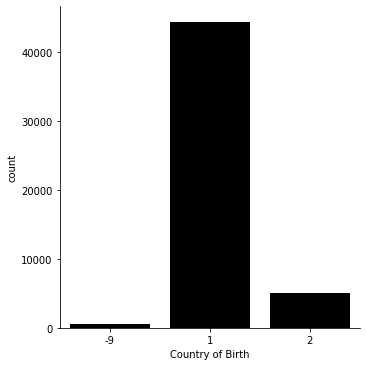

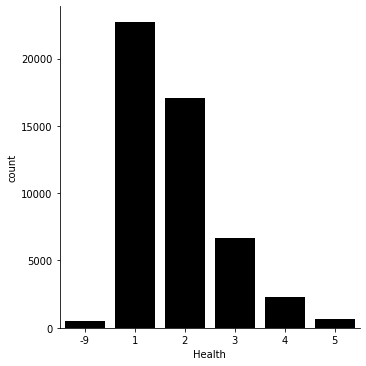

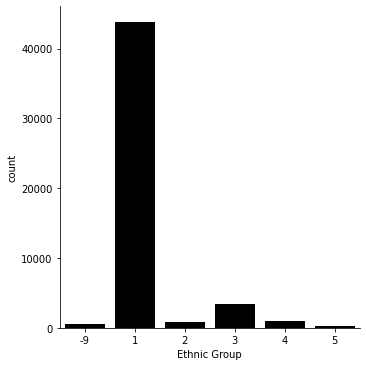

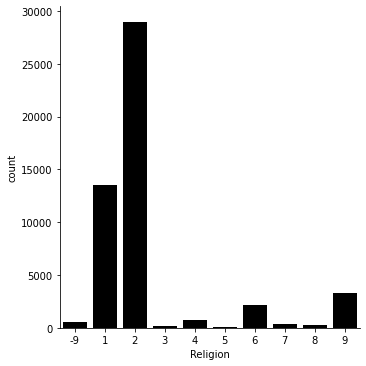

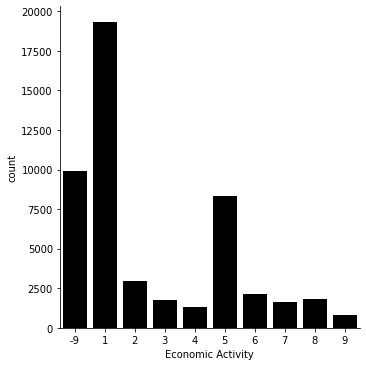

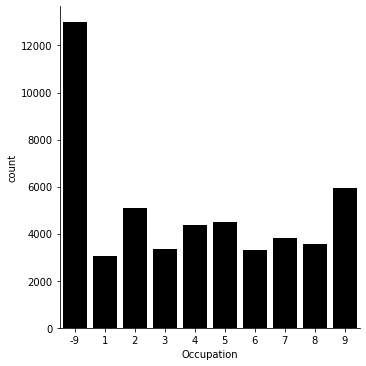

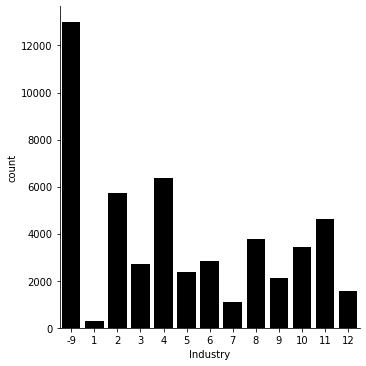

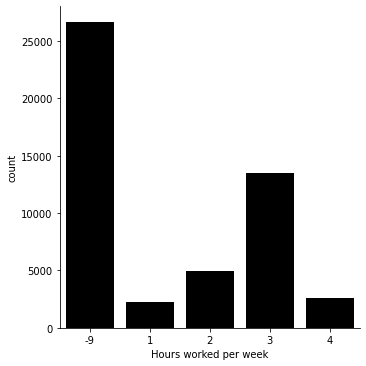

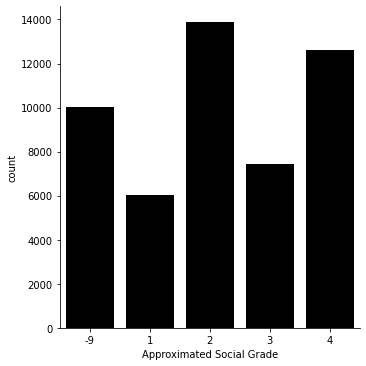

In [65]:
for col in synthetic_data_1.columns:
    sns.catplot(data=synthetic_data_1, x=col, kind='count', color='black') # normalise y axis if possible

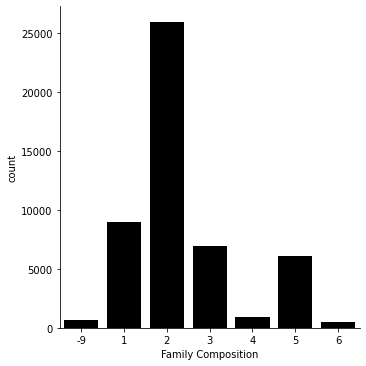

In [64]:
sns.catplot(data=census_dataset, x="Family Composition", kind='count', color='black') # grid (these)